# Creating An ANN using Pytorch 

In [29]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
import seaborn as sns

In [32]:
import numpy as np
df['Outcome'] = np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [33]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
5,5,116,74,0,0,25.6,0.201,30,No Diabetic
6,3,78,50,32,88,31.0,0.248,26,Diabetic
7,10,115,0,0,0,35.3,0.134,29,No Diabetic
8,2,197,70,45,543,30.5,0.158,53,Diabetic
9,8,125,96,0,0,0.0,0.232,54,Diabetic


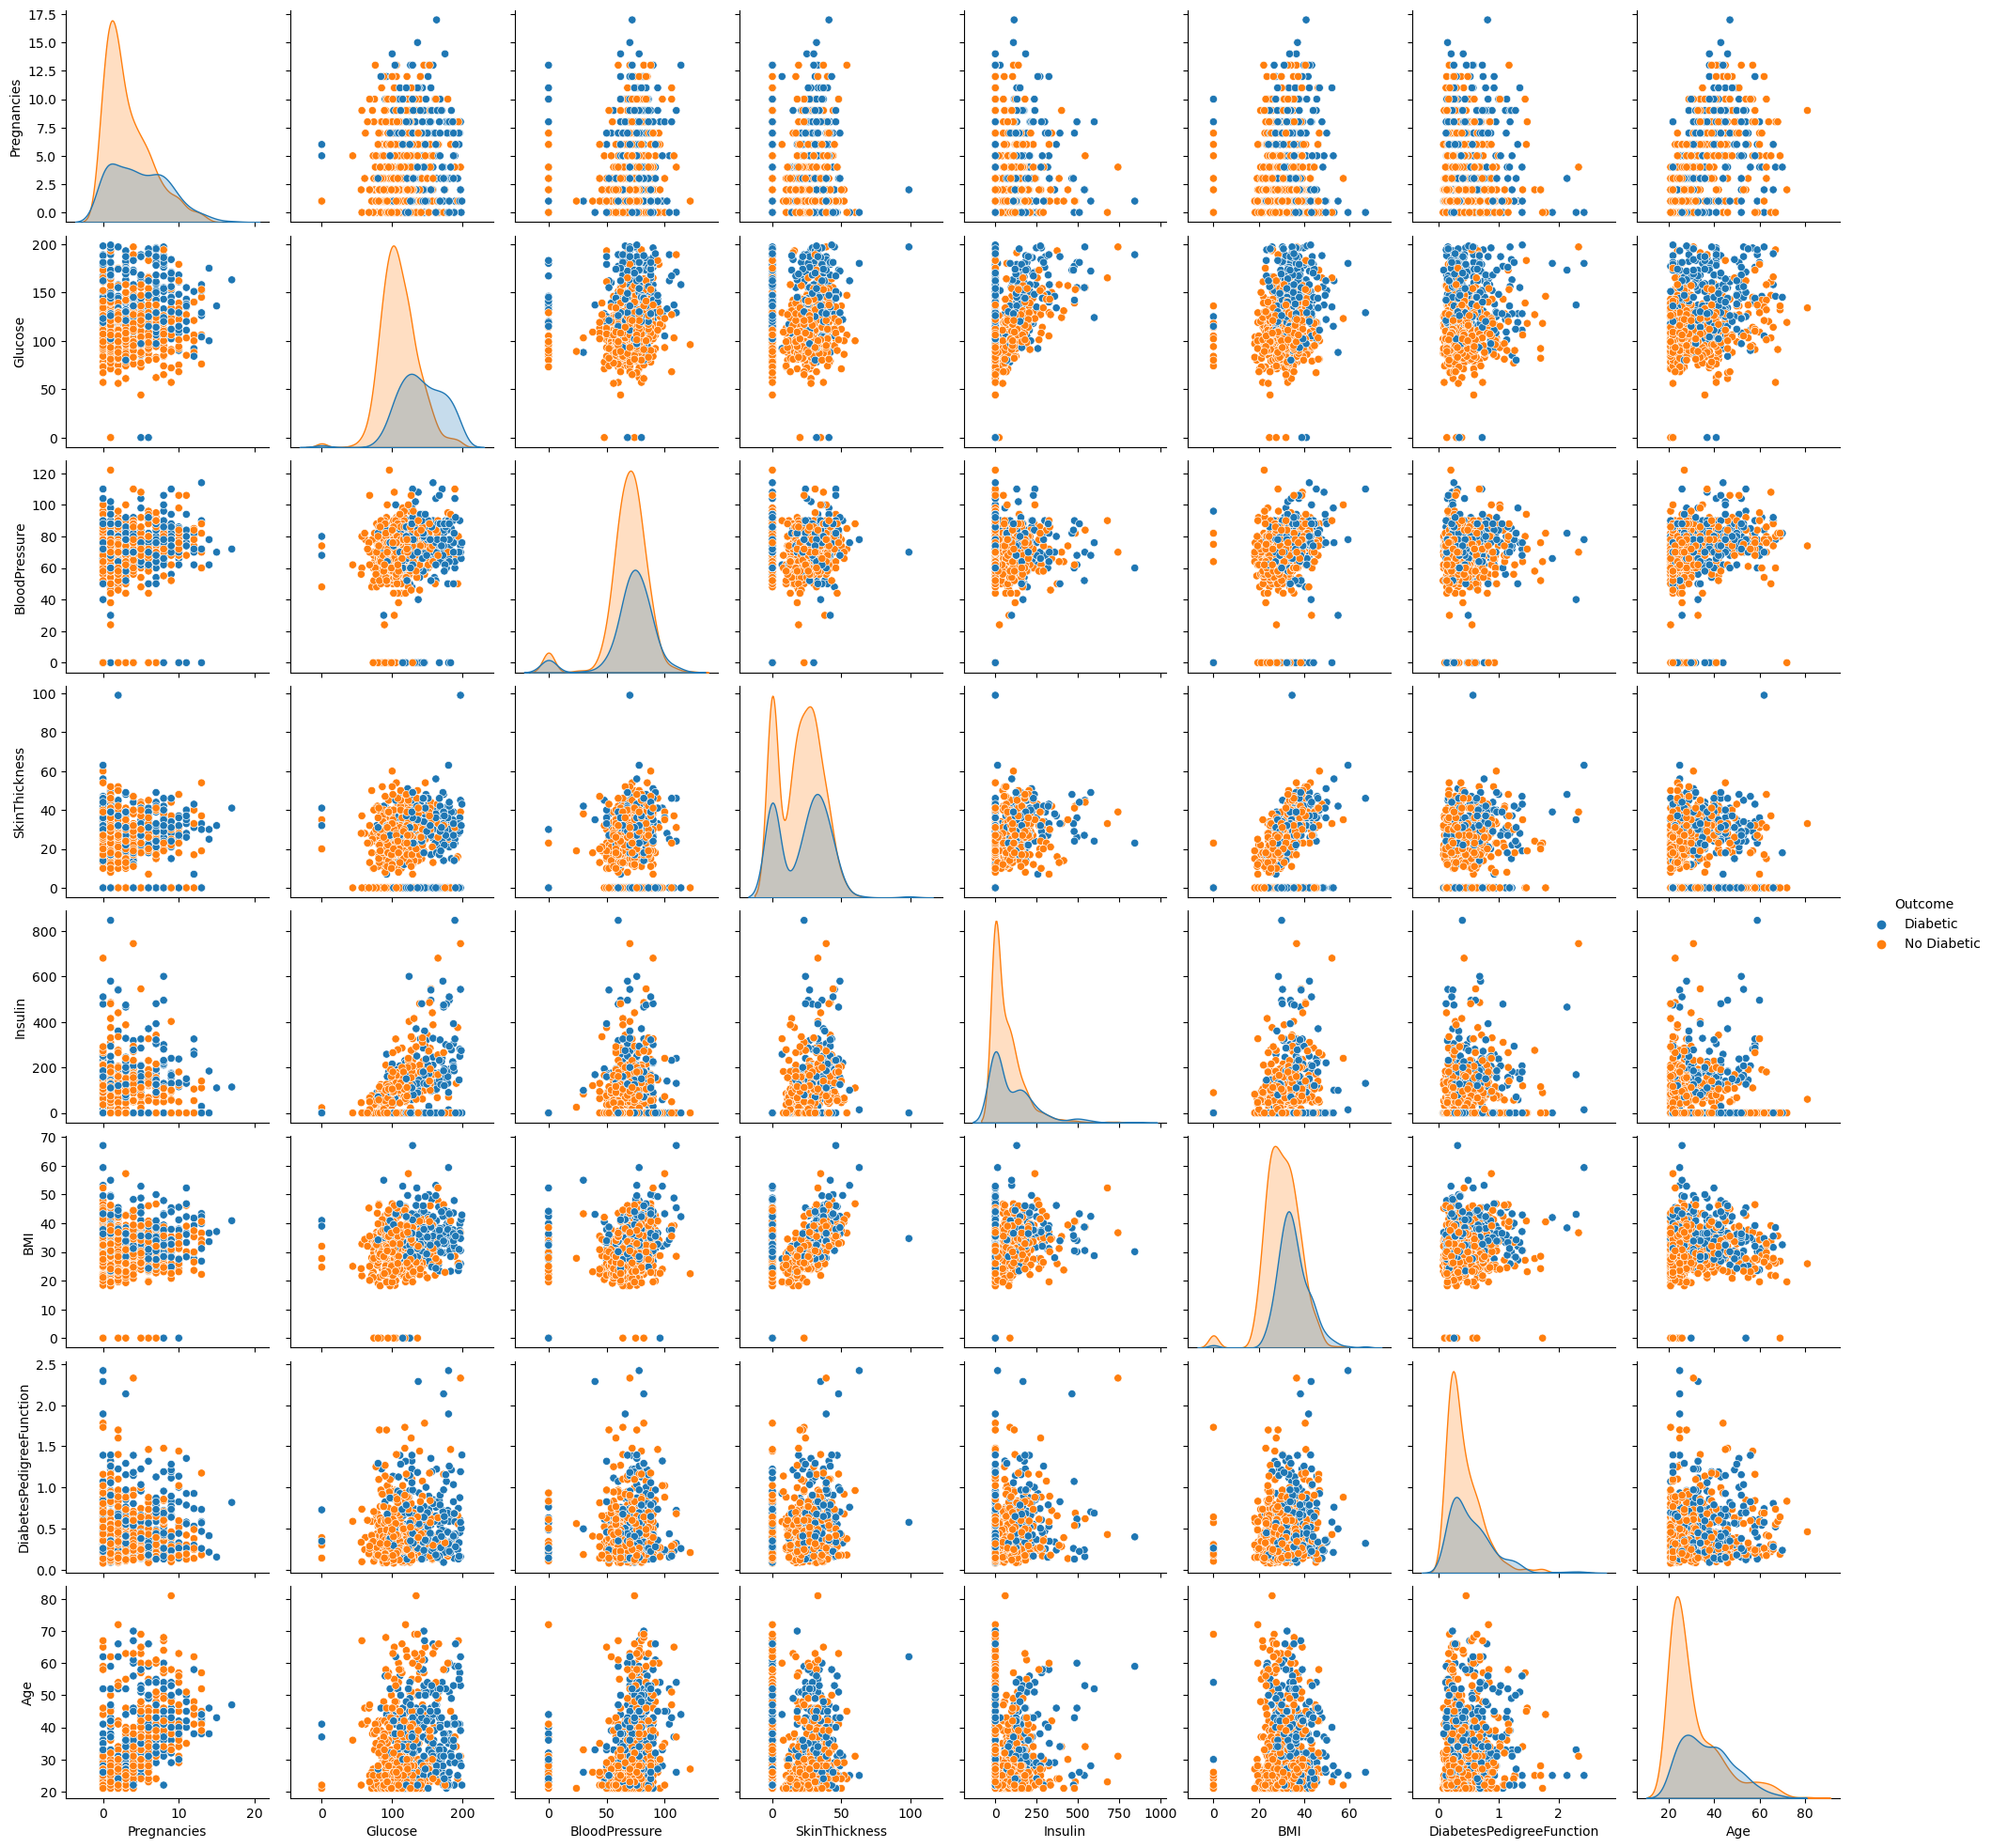

In [34]:
sns.pairplot(df,hue="Outcome")

In [35]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X=df.drop('Outcome',axis=1).values  ### Independent features
y=df['Outcome'].values ### Dependent features

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
### Libraries from Pytorch which we will be using
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
df.shape
##(768,9) 
### featues 9 , 8 input (independent) and 1 output (dependent)

(768, 9)

In [40]:
### Creating Tensors for dependent variable and independent variable
X_train = torch.FloatTensor(X_train)  ## Independent variable has to be converted to float tensors (what ever is the X value will be converted to floating points)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) ## not compulsary
y_test = torch.LongTensor(y_test)

In [41]:
### Creating Model with Pytorch
## we have to create class inherit nn class (hidden1 and hidden 2 will have 20 nodes)

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        # fully connected layer with input layer to hidden1
        self.f_connected1=nn.Linear(input_features,hidden1)
        # fully connected layer with hidden1 to hidden2
        self.f_connected2=nn.Linear(hidden1,hidden2)
        # fully connected layer with hidden2 to output layer
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        # F will have all the activation function
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [42]:
### Instantiate my ANN_Model
torch.manual_seed(20)
model=ANN_Model()

In [43]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [44]:
### Backward Propogation -- Define the Loss_function , define the optimizer
### loss_function = difference between the predicted value and the acutual output
### optimizer = the difference will be reduced with the help of optimizer

loss_function = nn.CrossEntropyLoss() ## used while working with multi class classifier
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) ## lr -- Learning rate (it should not be very large or very small then we cannot find the global minima)

In [45]:
### triger the forward propogation
epochs = 500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019207119941711
Epoch number: 21 and the loss : 0.6090322136878967
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135972499847412
Epoch number: 101 and the loss : 0.5061253905296326
Epoch number: 111 and the loss : 0.498340904712677
Epoch number: 121 and the loss : 0.4960551857948303
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4755900502204895
Epoch number: 151 and the loss : 0.48198607563972473
Epoch number: 161 and the loss : 0.48064836859703064
Epoch number: 171 and the loss : 0.4706920385360718
Epoch number: 181 and the loss : 0.45908692479133606
Epoch number: 191 an

In [50]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
### detaching
# new_epochs = torch.linspace(0,epochs,steps=500,requires_grad=True)
new_loss = torch.tensor(final_losses,requires_grad=True)
# x = new_epochs.detach().numpy()
y = new_loss.detach().numpy()

Text(0.5, 0, 'Epoch')

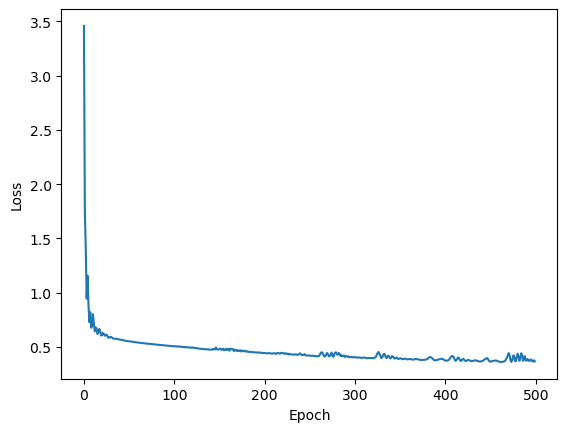

In [72]:
plt.plot(range(epochs),y)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [77]:
### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm


array([[92, 15],
       [15, 32]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

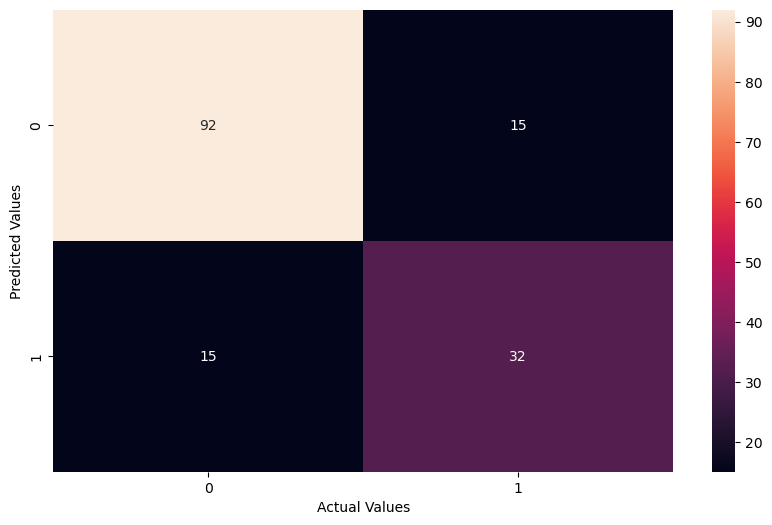

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [82]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.8051948051948052

In [83]:
### Save the model
torch.save(model,'diabetes.pt') ### save the entire model

In [84]:
### load the model
model = torch.load('diabetes.pt')

In [85]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [86]:
#### Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [87]:
### change some values in list (new data)
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
new_data = torch.tensor(lst1)

In [90]:
### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.5509, 1.4381])
0
